Database source: https://www.kaggle.com/datasets/aakashshakya/iea-ev-dataset-2023
This is an EDA for EV usage in the Nordics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
url = '/home/carlos/Dokument/data/iea.csv'

In [3]:
df = pd.read_csv(url)
df.head(20)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.00000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.00000
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
4,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
5,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00280
6,Australia,Historical,EV stock,Cars,BEV,2012,stock,220.00000
7,Australia,Historical,EV sales,Cars,PHEV,2012,sales,80.00000
8,Australia,Historical,EV sales,Cars,BEV,2012,sales,170.00000
9,Australia,Historical,EV stock,Cars,PHEV,2012,stock,80.00000


In [4]:
df.shape #to know the size of the dataset, that is approx 7500 rows spread out on 8 columns

(7434, 8)

In [5]:
df.describe()

,year,value
count,7434.000000,7.434000e+03
mean,2018.294996,2.510182e+05
std,4.910528,3.439397e+06
min,2010.000000,1.700000e-07
25%,2015.000000,6.900000e-01
50%,2018.000000,7.600000e+01
75%,2021.000000,3.700000e+03
max,2030.000000,1.800000e+08


In [6]:
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

In [7]:
df.groupby(['parameter', 'mode', 'powertrain'])['value'].count() 
#To undestand a bit more about the structure of the dataset

parameter              mode       powertrain             
EV charging points     EV         Publicly available fast    310
                                  Publicly available slow    313
EV sales               Buses      BEV                        218
                                  PHEV                        82
                       Cars       BEV                        393
                                  PHEV                       344
                       Trucks     BEV                        146
                                  PHEV                        54
                       Vans       BEV                        265
                                  PHEV                       107
EV sales share         Buses      EV                         227
                       Cars       EV                         405
                       Trucks     EV                         154
                       Vans       EV                         273
EV stock               Buses    

Let's take a look at Sweden's EV charging points across time.
That is focusing on Region = Sweden, Parameter = EV Charging Points and both Powertrains (fast and slow charging points)

In [8]:
EV = df[(df['region'] == 'Sweden') & (df['parameter']== 'EV charging points')]

In [9]:
ev_df = pd.DataFrame(EV)
ev_df

,region,category,parameter,mode,powertrain,year,unit,value
5721,Sweden,Historical,EV charging points,EV,Publicly available fast,2012,charging points,5.0
5722,Sweden,Historical,EV charging points,EV,Publicly available slow,2012,charging points,500.0
5725,Sweden,Historical,EV charging points,EV,Publicly available fast,2013,charging points,1000.0
5726,Sweden,Historical,EV charging points,EV,Publicly available slow,2013,charging points,1000.0
5749,Sweden,Historical,EV charging points,EV,Publicly available fast,2014,charging points,1100.0
5750,Sweden,Historical,EV charging points,EV,Publicly available slow,2014,charging points,1100.0
5753,Sweden,Historical,EV charging points,EV,Publicly available fast,2015,charging points,1300.0
5754,Sweden,Historical,EV charging points,EV,Publicly available slow,2015,charging points,1300.0
5788,Sweden,Historical,EV charging points,EV,Publicly available fast,2016,charging points,1700.0
5789,Sweden,Historical,EV charging points,EV,Publicly available slow,2016,charging points,1700.0


[Text(0.5, 1.0, 'Charging Points by Powertrain')]

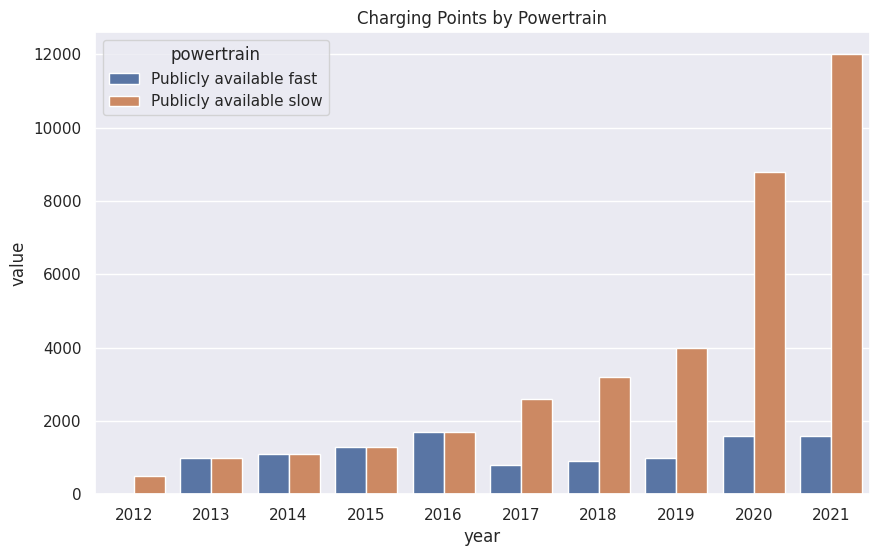

In [10]:
sns.set(rc={'figure.figsize':(10,6)}) #adjusting size so it is readable
sns.barplot(data=ev_df, x="year", y="value", hue = 'powertrain').set(title = 'Charging Points by Powertrain')

Now, lets check the EV sales for vehicles in Sweden.

In [11]:
EV_veh = df[(df['region'] == 'Sweden') & (df['parameter']== 'EV sales')]
ev_veh_df = pd.DataFrame(EV_veh)
ev_veh_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
5698,Sweden,Historical,EV sales,Cars,BEV,2010,sales,4.0
5707,Sweden,Historical,EV sales,Cars,BEV,2011,sales,180.0
5708,Sweden,Historical,EV sales,Vans,BEV,2011,sales,9.0
5711,Sweden,Historical,EV sales,Vans,BEV,2012,sales,280.0
5712,Sweden,Historical,EV sales,Cars,BEV,2012,sales,270.0


Note that this will show us the amount of EV registered and not the percapita or any other population ratio per country as we dont have population data in this exercise.

[Text(0.5, 1.0, 'EV sales in Sweden')]

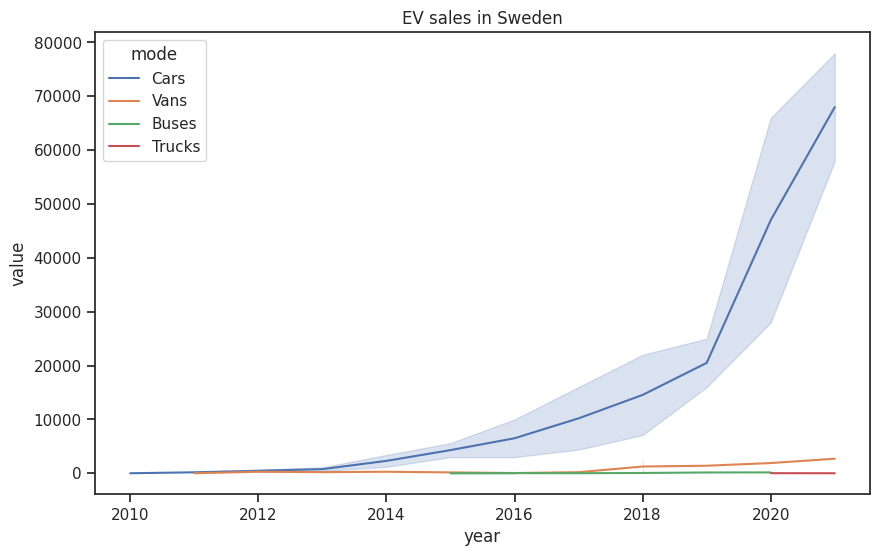

In [25]:
sns.lineplot(data=ev_veh_df, x="year", y="value", hue = 'mode').set(title = 'EV sales in Sweden')

Lets look closer into the cars sales as it is the most prevalent

In [13]:
EV_cars = df[(df['region'] == 'Sweden') & (df['parameter']== 'EV sales') & (df['mode']== 'Cars')]
ev_cars_df = pd.DataFrame(EV_cars)

[Text(0.5, 1.0, 'EV Sales in Sweden, Cars')]

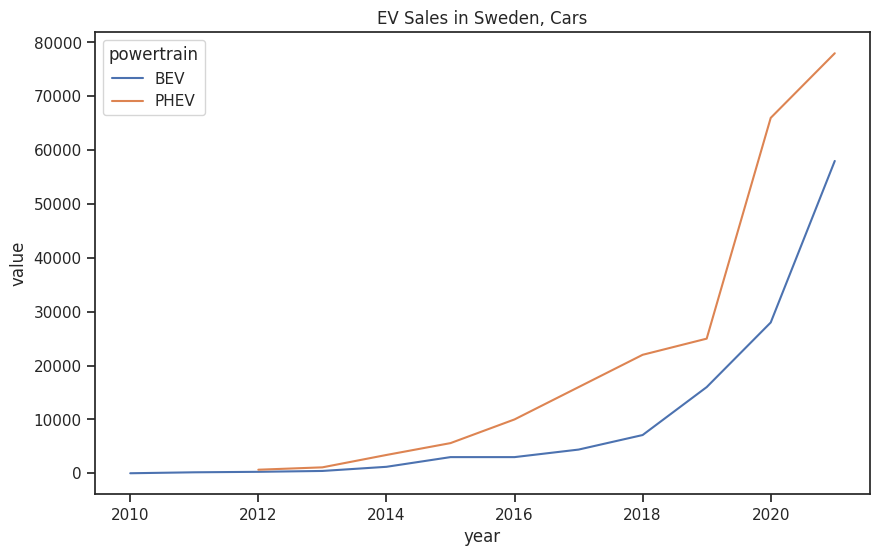

In [26]:
sns.lineplot(data=ev_cars_df, x="year", y="value", hue = 'powertrain').set(title = 'EV Sales in Sweden, Cars')

Let's take a look at what the sales of EV cars look like in the Nordics.
I wasn't clear about the difference so here just in case:

EV/BEV: Battery electric vehicles are pure electric vehicles, so they are sometimes abbreviated as EV in addition to the more specific BEV. This type of vehicle uses a rechargeable battery as a power source to run an electric motor. They can be charged slowly by an outlet at your house, or rapidly using a charging station.

PHEV: Plug-in hybrid vehicles are a variation of hybrid electrics that can be plugged in to charge. This variety tends to have a larger all-electric range than a traditional hybrid.

Source: https://www.lifewire.com/ev-phev-fcev-hybrid-compared-5201137

In [15]:
nordics = ['Denmark', 'Finland', 'Norway', 'Sweden']

In [16]:
EV_nord = df[(df['region'].isin(nordics)) & (df['parameter']== 'EV sales') & (df['mode']== 'Cars')]

In [17]:
EV_nord.shape

(88, 8)

Text(0.5, 1.0, 'Nordic EV Sales, Cars')

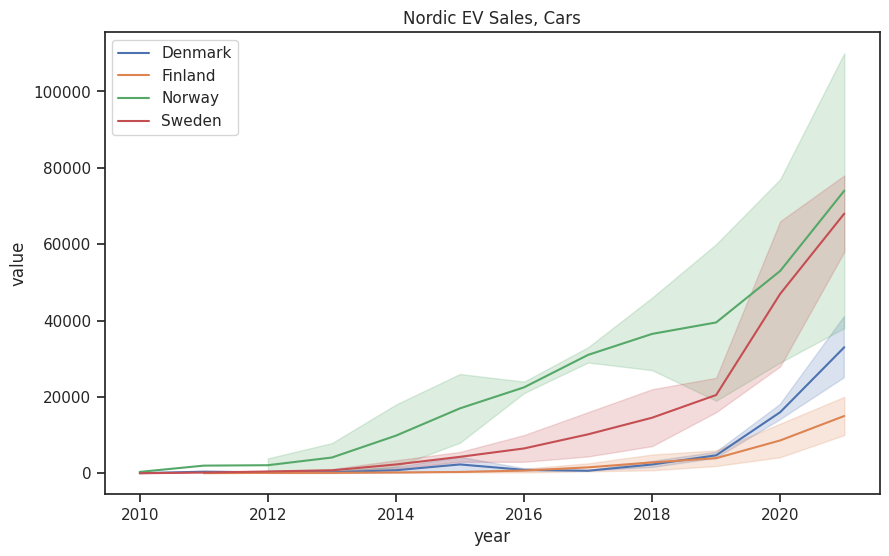

In [27]:
sns.lineplot(data=EV_nord, x="year", y="value", hue = 'region')
plt.legend(loc='upper left') #because the default was having the legend on the top right side of the plot'
plt.title('Nordic EV Sales, Cars')

This is the amount of EV (cars) in the Nordics. We know how the amount of charging stations for Sweden have changed but now I want to know how this looks for the rest of the Nordic countries. I am guessing, considering the way the previous graph looks like, that we will have something similar when it comes to how leads the way (Norway).

[Text(0.5, 1.0, 'Charging Points in the Nordics')]

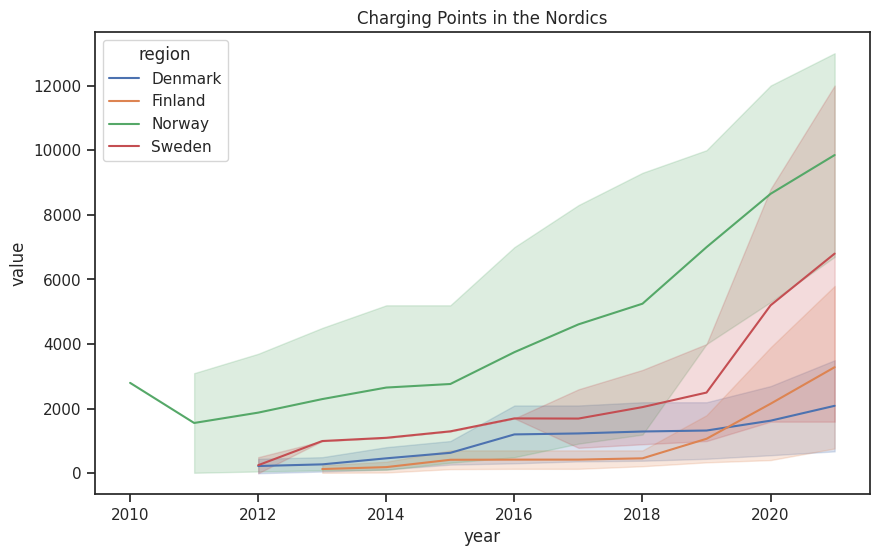

In [28]:
EV_nord_cs = df[(df['region'].isin(nordics)) & (df['parameter']== 'EV charging points')]
sns.lineplot(data = EV_nord_cs, x = 'year', y='value', hue = 'region').set(title = 'Charging Points in the Nordics')

Looks a bit crowded. I am trying now seaborn's FacitGrid plot

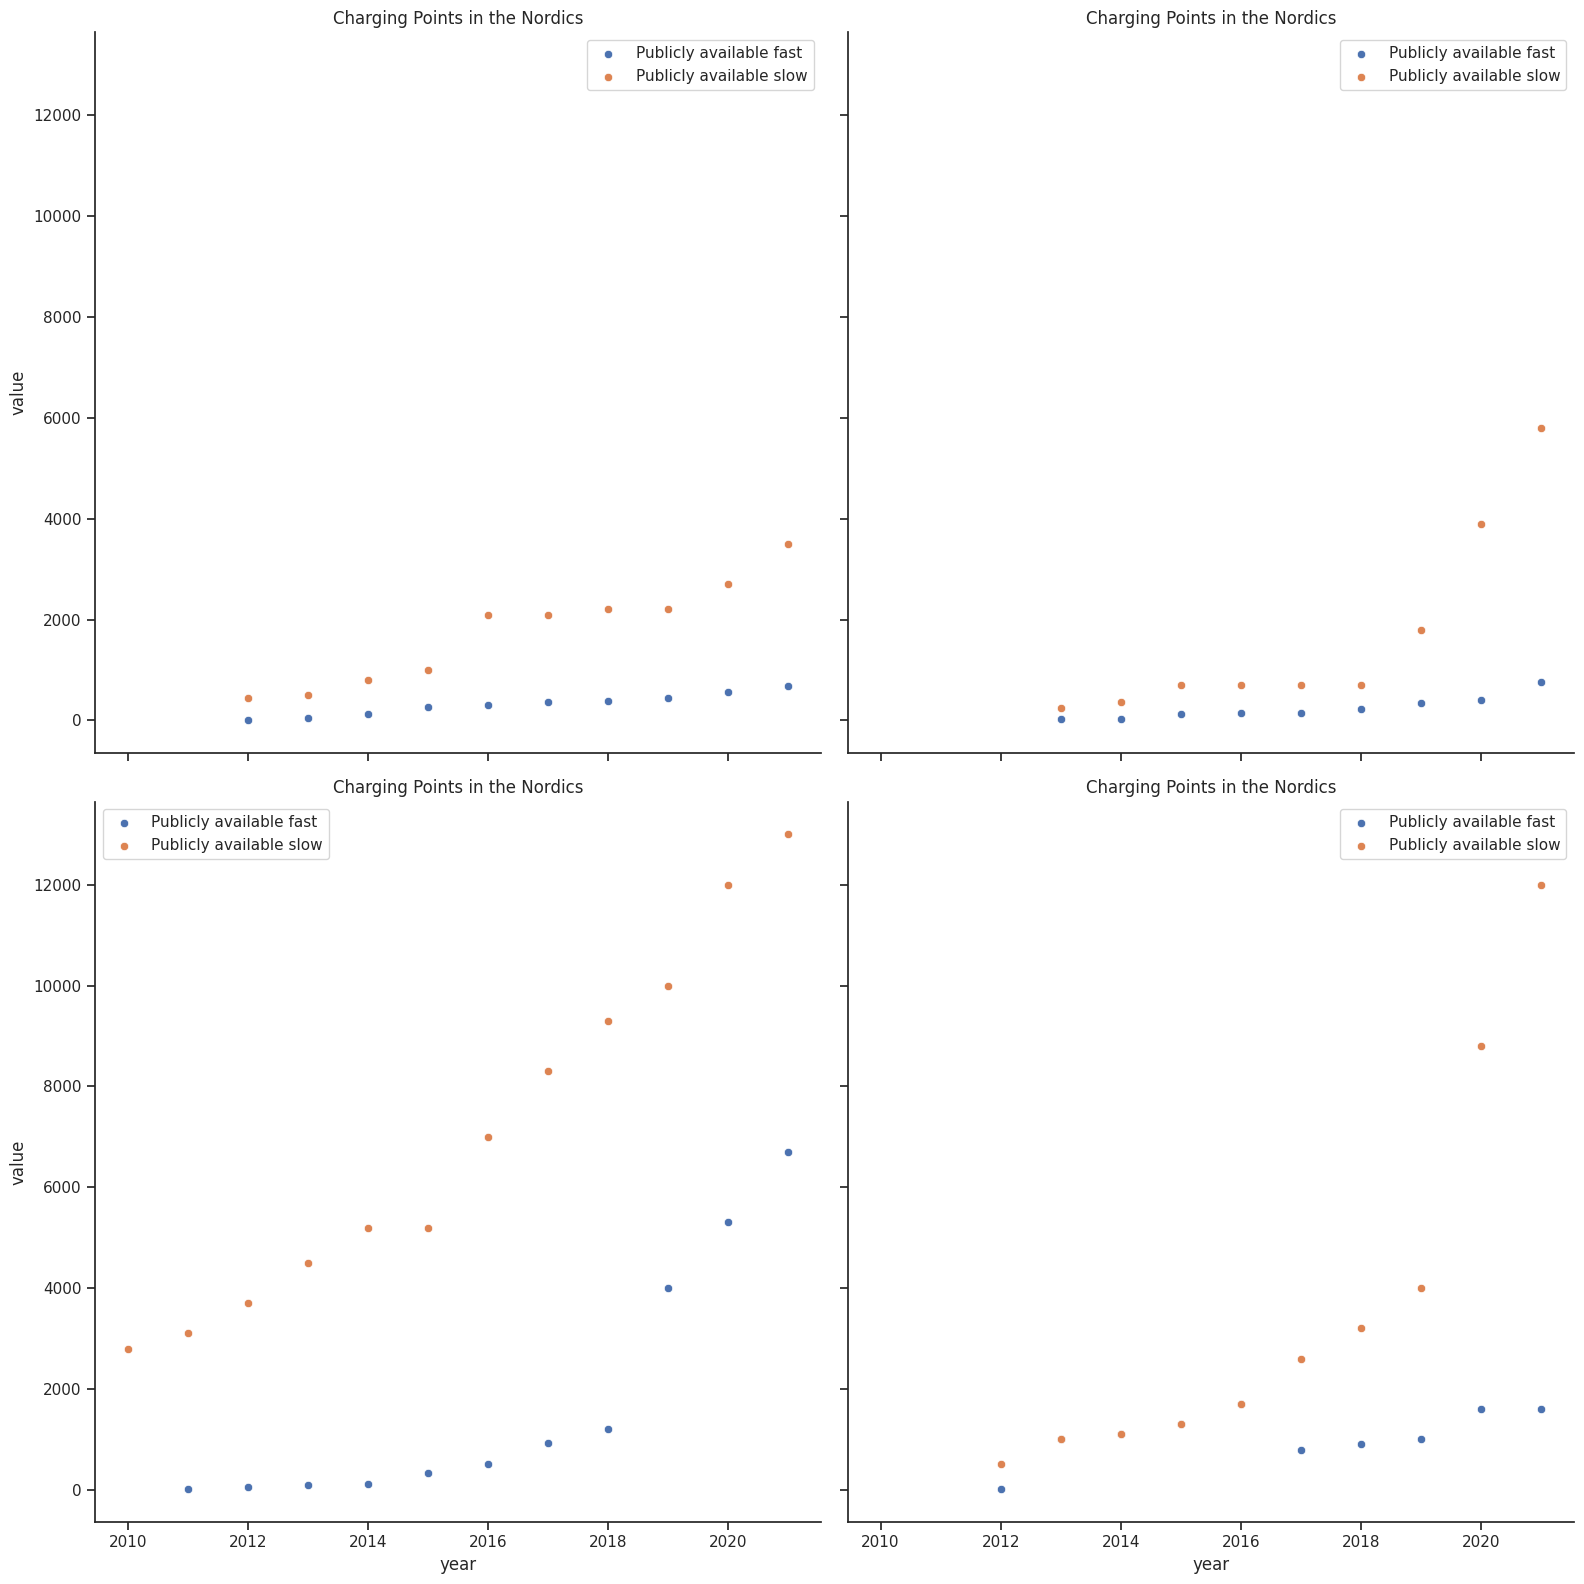

In [29]:
sns.set_theme(style="ticks")
grid = sns.FacetGrid(EV_nord_cs, col='region', hue = 'powertrain',
                     col_wrap=2, height=8)
grid.map(sns.scatterplot, "year", "value").set(title = 'Charging Points in the Nordics')
for ax in grid.axes.ravel():
    ax.legend()

Great. So from the FacitGrid plot we confirm that Norway and to an extent Sweden are quite advanced when it comes to EV charging points infrastructure. For both cases it is the slow charging speed the most prevalent with most countries (at the time when this set was extracted) not prioritizing the fast charging stations, with the exception of Norway.

One last question? What does the EV (cars) sales share looks like in the four Nordic countries?

In [21]:
EV_stock_cars = df[(df['region'].isin(nordics)) & (df['parameter']== 'EV sales share') & (df['mode']== 'Cars')]

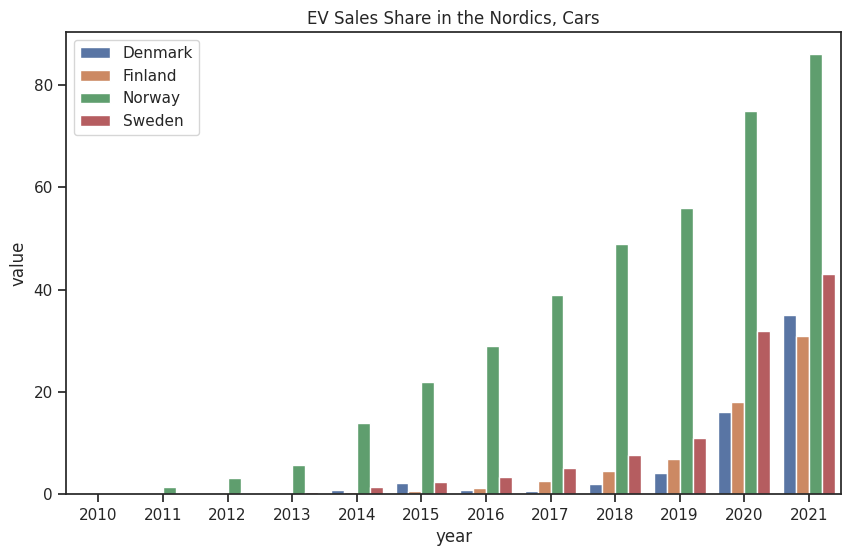

In [31]:
sns.barplot(data=EV_stock_cars, x="year", y="value", hue = 'region').set(title = 'EV Sales Share in the Nordics, Cars')
plt.legend(loc='upper left')

In [23]:
EV_cars_no = df[(df['region'] == 'Norway') & (df['parameter']== 'EV sales share') & (df['mode']== 'Cars')]
EV_cars_no

,region,category,parameter,mode,powertrain,year,unit,value
4315,Norway,Historical,EV sales share,Cars,EV,2010,percent,0.28
4316,Norway,Historical,EV sales share,Cars,EV,2011,percent,1.40
4338,Norway,Historical,EV sales share,Cars,EV,2012,percent,3.10
4339,Norway,Historical,EV sales share,Cars,EV,2013,percent,5.80
4362,Norway,Historical,EV sales share,Cars,EV,2014,percent,14.00
4363,Norway,Historical,EV sales share,Cars,EV,2015,percent,22.00
4390,Norway,Historical,EV sales share,Cars,EV,2016,percent,29.00
4391,Norway,Historical,EV sales share,Cars,EV,2017,percent,39.00
4430,Norway,Historical,EV sales share,Cars,EV,2018,percent,49.00
4431,Norway,Historical,EV sales share,Cars,EV,2019,percent,56.00


In [24]:
EV_cars_no_st = df[(df['region'] == 'Norway') & (df['parameter']== 'EV stock share') & (df['mode']== 'Cars')]
EV_cars_no_st

,region,category,parameter,mode,powertrain,year,unit,value
4314,Norway,Historical,EV stock share,Cars,EV,2010,percent,0.13
4318,Norway,Historical,EV stock share,Cars,EV,2011,percent,0.18
4336,Norway,Historical,EV stock share,Cars,EV,2012,percent,0.38
4341,Norway,Historical,EV stock share,Cars,EV,2013,percent,0.69
4360,Norway,Historical,EV stock share,Cars,EV,2014,percent,1.50
4365,Norway,Historical,EV stock share,Cars,EV,2015,percent,2.90
4388,Norway,Historical,EV stock share,Cars,EV,2016,percent,4.70
4393,Norway,Historical,EV stock share,Cars,EV,2017,percent,7.20
4428,Norway,Historical,EV stock share,Cars,EV,2018,percent,10.00
4433,Norway,Historical,EV stock share,Cars,EV,2019,percent,13.00


Starting from 2018 at least 50% of the cars sold in Norway were EV which represented 10% of the car stock. By 2021 almost 9 out of 10 cars sold were EV (!) already making up 1/4 of all the car stock in Norway.